In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [129]:
data = pd.read_csv('term-deposit-marketing-2020.csv')
data
#reading csv file

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [130]:
data.info()
#loking into details and types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [131]:
data.describe()
#checking count, std etc.

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [132]:
categorical_columns = list(data.columns[data.dtypes == 'object'])
categorical_columns
#getting categorical columns, I use this list later to encode 

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'y']

In [133]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

In [134]:
data[categorical_columns] = data[categorical_columns].astype('category')
#chaning object types to type category , I need this change while i do encoding part

In [135]:
data.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
y            category
dtype: object

In [136]:
numerical_df = data.select_dtypes(include=np.number)
numerical_df
#creating new data frame with only numerical columns because I need this for scaling my data

,age,balance,day,duration,campaign
0,58,2143,5,261,1
1,44,29,5,151,1
2,33,2,5,76,1
3,47,1506,5,92,1
4,33,1,5,198,1
...,...,...,...,...,...
39995,53,395,3,107,1
39996,30,3340,3,238,3
39997,54,200,3,170,1
39998,34,1047,3,342,1


In [137]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

scaler = StandardScaler()
#creating standardscaler and fitting and transforming my data frame that i created with numerical columns
# transform data
scaled = scaler.fit_transform(numerical_df)
dataset = DataFrame(scaled)
#creating new data frame with scaled columns

In [138]:
dataset

,0,1,2,3,4
0,1.810415,0.299174,-1.330900,0.023811,-0.581096
1,0.358382,-0.428854,-1.330900,-0.400305,-0.581096
2,-0.782501,-0.438152,-1.330900,-0.689474,-0.581096
3,0.669532,0.079802,-1.330900,-0.627785,-0.581096
4,-0.782501,-0.438497,-1.330900,-0.219092,-0.581096
...,...,...,...,...,...
39995,1.291832,-0.302809,-1.572504,-0.569951,-0.581096
39996,-1.093650,0.711402,-1.572504,-0.064868,0.036377
39997,1.395549,-0.369964,-1.572504,-0.327048,-0.581096
39998,-0.678784,-0.078271,-1.572504,0.336114,-0.581096


In [139]:
rename_dict = {0:"age",1:"balance",2:"day",3:"duration",4:"campaign"}
#changing column names as it used to be
dataset = dataset.rename(columns= rename_dict, inplace = False)

dataset

,age,balance,day,duration,campaign
0,1.810415,0.299174,-1.330900,0.023811,-0.581096
1,0.358382,-0.428854,-1.330900,-0.400305,-0.581096
2,-0.782501,-0.438152,-1.330900,-0.689474,-0.581096
3,0.669532,0.079802,-1.330900,-0.627785,-0.581096
4,-0.782501,-0.438497,-1.330900,-0.219092,-0.581096
...,...,...,...,...,...
39995,1.291832,-0.302809,-1.572504,-0.569951,-0.581096
39996,-1.093650,0.711402,-1.572504,-0.064868,0.036377
39997,1.395549,-0.369964,-1.572504,-0.327048,-0.581096
39998,-0.678784,-0.078271,-1.572504,0.336114,-0.581096


In [140]:
categorical_df = data.select_dtypes(include= ["category"])
categorical_df


,job,marital,education,default,housing,loan,contact,month,y
0,management,married,tertiary,no,yes,no,unknown,may,no
1,technician,single,secondary,no,yes,no,unknown,may,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,no
4,unknown,single,unknown,no,no,no,unknown,may,no
...,...,...,...,...,...,...,...,...,...
39995,technician,married,tertiary,no,no,no,cellular,jun,no
39996,management,single,tertiary,no,no,no,cellular,jun,yes
39997,admin,divorced,secondary,no,no,no,cellular,jun,yes
39998,management,married,tertiary,no,no,no,cellular,jun,no


In [141]:
cleaned_data = pd.merge(left=categorical_df, left_index=True,right=dataset, right_index=True, how='inner')
#merging 2 dataset, first one is the one that i done scaled on, and second one is the one that has categorical columns

In [142]:
cleaned_data


,job,marital,education,default,housing,loan,contact,month,y,age,balance,day,duration,campaign
0,management,married,tertiary,no,yes,no,unknown,may,no,1.810415,0.299174,-1.330900,0.023811,-0.581096
1,technician,single,secondary,no,yes,no,unknown,may,no,0.358382,-0.428854,-1.330900,-0.400305,-0.581096
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,no,-0.782501,-0.438152,-1.330900,-0.689474,-0.581096
3,blue-collar,married,unknown,no,yes,no,unknown,may,no,0.669532,0.079802,-1.330900,-0.627785,-0.581096
4,unknown,single,unknown,no,no,no,unknown,may,no,-0.782501,-0.438497,-1.330900,-0.219092,-0.581096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,technician,married,tertiary,no,no,no,cellular,jun,no,1.291832,-0.302809,-1.572504,-0.569951,-0.581096
39996,management,single,tertiary,no,no,no,cellular,jun,yes,-1.093650,0.711402,-1.572504,-0.064868,0.036377
39997,admin,divorced,secondary,no,no,no,cellular,jun,yes,1.395549,-0.369964,-1.572504,-0.327048,-0.581096
39998,management,married,tertiary,no,no,no,cellular,jun,no,-0.678784,-0.078271,-1.572504,0.336114,-0.581096


In [144]:
def encode_categorical(df,categorical_columns):
    for category in categorical_columns:
        df[category]  = df[category].cat.codes
    return df
#with this function I do encoding for categorical columns only

data_encoded = encode_categorical(cleaned_data,categorical_columns)

data_encoded
#data_encoded is the final data set i reach, it's been scaled and encoded so its ready to usee for model

,job,marital,education,default,housing,loan,contact,month,y,age,balance,day,duration,campaign
0,4,1,2,0,1,0,2,8,0,1.810415,0.299174,-1.330900,0.023811,-0.581096
1,9,2,1,0,1,0,2,8,0,0.358382,-0.428854,-1.330900,-0.400305,-0.581096
2,2,1,1,0,1,1,2,8,0,-0.782501,-0.438152,-1.330900,-0.689474,-0.581096
3,1,1,3,0,1,0,2,8,0,0.669532,0.079802,-1.330900,-0.627785,-0.581096
4,11,2,3,0,0,0,2,8,0,-0.782501,-0.438497,-1.330900,-0.219092,-0.581096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,9,1,2,0,0,0,0,6,0,1.291832,-0.302809,-1.572504,-0.569951,-0.581096
39996,4,2,2,0,0,0,0,6,1,-1.093650,0.711402,-1.572504,-0.064868,0.036377
39997,0,0,1,0,0,0,0,6,1,1.395549,-0.369964,-1.572504,-0.327048,-0.581096
39998,4,1,2,0,0,0,0,6,0,-0.678784,-0.078271,-1.572504,0.336114,-0.581096


In [145]:
train_x = data_encoded.drop('y', axis=1)
target_label = data_encoded["y"]
#train_x has all the features except target feature which is y

train_x


,job,marital,education,default,housing,loan,contact,month,age,balance,day,duration,campaign
0,4,1,2,0,1,0,2,8,1.810415,0.299174,-1.330900,0.023811,-0.581096
1,9,2,1,0,1,0,2,8,0.358382,-0.428854,-1.330900,-0.400305,-0.581096
2,2,1,1,0,1,1,2,8,-0.782501,-0.438152,-1.330900,-0.689474,-0.581096
3,1,1,3,0,1,0,2,8,0.669532,0.079802,-1.330900,-0.627785,-0.581096
4,11,2,3,0,0,0,2,8,-0.782501,-0.438497,-1.330900,-0.219092,-0.581096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,9,1,2,0,0,0,0,6,1.291832,-0.302809,-1.572504,-0.569951,-0.581096
39996,4,2,2,0,0,0,0,6,-1.093650,0.711402,-1.572504,-0.064868,0.036377
39997,0,0,1,0,0,0,0,6,1.395549,-0.369964,-1.572504,-0.327048,-0.581096
39998,4,1,2,0,0,0,0,6,-0.678784,-0.078271,-1.572504,0.336114,-0.581096


In [146]:
target_label
#its only Y column

0        0
1        0
2        0
3        0
4        0
        ..
39995    0
39996    1
39997    1
39998    0
39999    0
Name: y, Length: 40000, dtype: int8

In [148]:
#DATA SPLITTING FOR MODEL
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_x, target_label, test_size = 0.2)

#splitting my dataset for train and test, train part is %80 of data and test is %20



In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

log_reg = LogisticRegression()
accuracy = cross_val_score(log_reg, x_train, y_train, scoring ="accuracy", cv =5)
print("Accuracy of Logistic with Cross Validation is:",accuracy.mean() * 100)

#creating logistic regression and calling cross validation with it and getting final result

#it seems my model is so over %82 :) 


Accuracy of Logistic with Cross Validation is: 93.321875


job Score: -0.00331
marital Score: 0.11642
education Score: 0.15655
default Score: -0.00571
housing Score: -0.50162
loan Score: -0.41296
contact Score: -0.47803
month Score: -0.00574
age Score: -0.05054
balance Score: 0.06304
day Score: -0.00715
duration Score: 1.14414
campaign Score: -0.24251


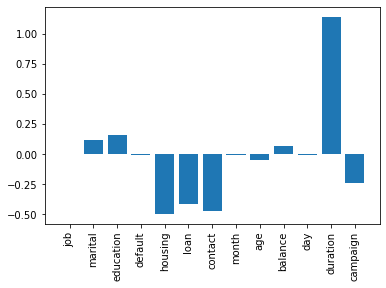

In [154]:
log_reg2 = LogisticRegression()
log_reg2.fit(x_train,y_train)

importance = log_reg2.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
	print(x_train.columns[i],'Score: %.5f' % (v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks(np.arange(13), x_train.columns, rotation='vertical')
pyplot.show()

#help is taken for this part from stackoverflow

#here i create new model and try to find feature importance and it seems duration is most important, negatives affact negative of customer behavior

In [ ]:
#MOST IMPORTANT FEATURE FOR US IS # DURATION,  more you talk with customer , they more likely to subscribe


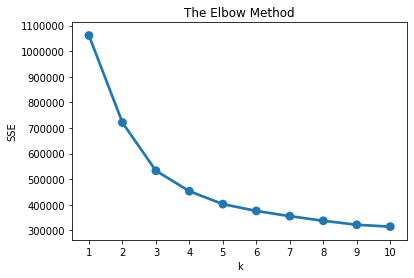

In [155]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encoded)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [157]:
# 3 or 4 cluster would be the best
model = KMeans(n_clusters=3, random_state=42)
model.fit(data_encoded)
model.labels_.shape


(40000,)

In [ ]:
#since i already work , i have limited time and did not make you wait longer so i pass customer segmantion for now , i would use kmeans clustering tho

#ZAMAN AYIRDIGINIZ ICIN TESEKKURLER, CALISMAM HAKKINDA OLUMLU OLUMSUZ FEEDBACK VERIRSENIZ COK SEVINIRIM , SAYGILAR 
 MAAŞ BEKLENTİSİNE SUAN ALDIGIM MAAŞIMA YAKIN YAZDIM 
 ÖNCELİGİM KENDİMİ GELİSTİREBİLECEGİM BİR POZİSYON VE YARDIM ALABİLECEGİM BİR SENİORIN OLMASI DAHA ÖEMLİ